In [3]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [21]:
f = h5py.File("data/221006_152525_spec_run.h5", 'r')
print(f.keys())
M = f['measurement/spec_run']
M.keys()

<KeysViewHDF5 ['app', 'hardware', 'measurement']>


<KeysViewHDF5 ['pl_dark_spectrum', 'pl_ref_spectrum', 'pl_spectra', 'pl_wls', 'pl_x_array', 'settings', 'wl_dark_spectrum', 'wl_ref_spectrum', 'wl_spectra', 'wl_wls', 'wl_x_array']>

In [22]:
dict(M['settings'].attrs)

{'activation': True,
 'eject_after': False,
 'pl_repeats': 3,
 'pl_x_center': 84000,
 'pl_x_dark': 70000,
 'pl_x_max': 93000,
 'pl_x_min': 75000,
 'pl_x_num': 19,
 'pl_x_ref': 30000,
 'pl_x_span': 18000,
 'pl_x_step': 1000,
 'pl_y': 20000,
 'profile': False,
 'progress': 50.0,
 'run_state': 'run_thread_run',
 'wl_repeats': 10,
 'wl_x_center': 70000,
 'wl_x_dark': 55000,
 'wl_x_max': 80000,
 'wl_x_min': 60000,
 'wl_x_num': 21,
 'wl_x_ref': 30000,
 'wl_x_span': 20000,
 'wl_x_step': 1000,
 'wl_y': 2000}

# PL 

In [23]:
x_array = np.array(M['pl_x_array'])
wls = np.array(M['pl_wls'])
spectra = np.array(M['pl_spectra'])
dark = np.array(M['pl_dark_spectrum'])
ref = np.array(M['pl_ref_spectrum'])
print(spectra.shape)

(19, 2048)


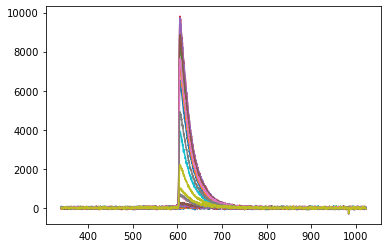

In [24]:
for i in range(spectra.shape[0]):
    plt.plot(wls,spectra[i]-dark)


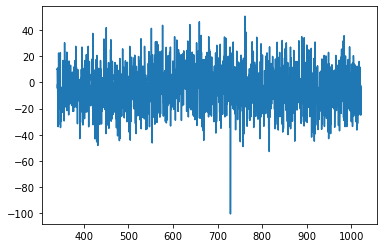

In [25]:
plt.plot(wls, ref-dark)

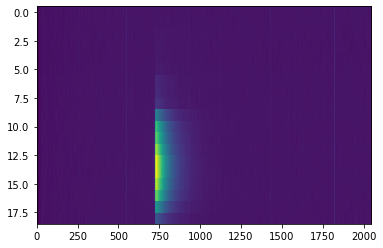

In [26]:
plt.imshow(spectra, aspect='auto', interpolation='nearest')

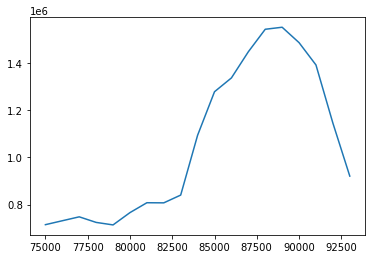

In [27]:
plt.plot(x_array, np.sum(spectra, axis=1))

# WL

In [28]:
x_array = np.array(M['wl_x_array'])
wls = np.array(M['wl_wls'])
spectra = np.array(M['wl_spectra'])
dark = np.array(M['wl_dark_spectrum'])
ref = np.array(M['wl_ref_spectrum'])
print(spectra.shape)

(21, 3648)


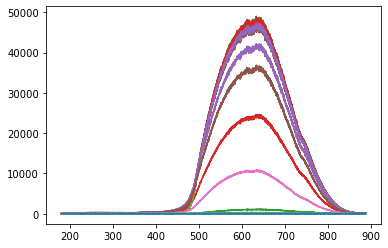

In [29]:
for i in range(spectra.shape[0]):
    plt.plot(wls,spectra[i]-dark)

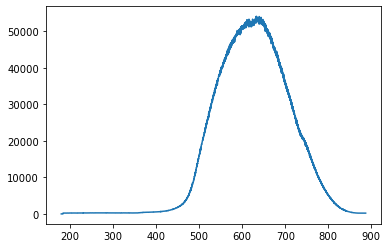

In [30]:
plt.plot(wls, ref-dark)

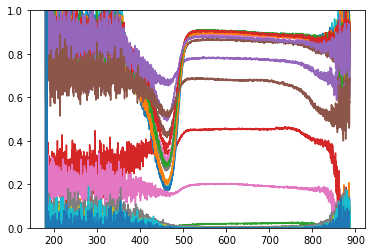

In [32]:
for i in range(spectra.shape[0]):
    plt.plot(wls, (spectra[i]-dark)/(ref-dark))
    plt.ylim(0,1)